<a href="https://colab.research.google.com/github/on1ystar/Do-it-DL/blob/master/03_%EC%88%98%EC%B9%98%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03-1 선형 회귀(Linear Regression)

---

## 선형 회귀란  

선형 = 직선 그래프(1차 함수)

$$y = ax + b$$
a = 기울기(slope)  
b = 절편(inrercept)  

여기서 기울기와 절편은 머신러닝에서 규칙이라 칭한다. 

회귀 분석 = 관찰된 연속형 변수들에 대해 두 변수 사이의 모형을 구한뒤 적합도를 측정해 내는 분석 방법  

따라서 선형회귀는 <u>**절편과 기울기(규칙)를 찾는 것**</u>이다.  

만약 다음과 같은 입력과 타깃이 있다.

In [0]:
input_data = [3, 4, 5]
target = [25, 32, 39]

이를 좌표평면에 나타내면 다음과 같다.


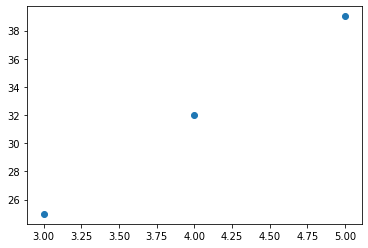

In [28]:
import matplotlib.pyplot as plt
import numpy as np
plt.scatter(input_data, target)
plt.show()

선형 회귀는 위의 점들을 잘 나타낼 수 있는 직선 그래프(1차 함수) 모델을 기울기와 절편을 이용해 찾는 방법이다.  
예를 들어 기울기 6과 절편 4를 가진 그래프를 그려보면 다음과 같다.

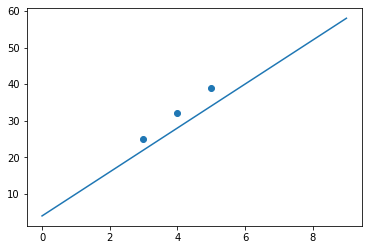

In [29]:
x = [x for x in range(10)]
y = [x*6+4 for x in range(10)]
plt.scatter(input_data, target)
plt.plot(x, y)
plt.show()

코드를 작성하면서 이 그래프는 입력과 타깃을 지나지 않는 그래프라는 것을 알겠지만, 선형 회귀를 이용해 문제를 푸는 매커니즘을 이해하기 위함이다.  
시각화된 그래프를 보면 기울기와 절편의 크기를 더 키워야 할 것 같다.  
따라서 다음과 같이 기울기를 7로, 절편을 5로 수정한다.

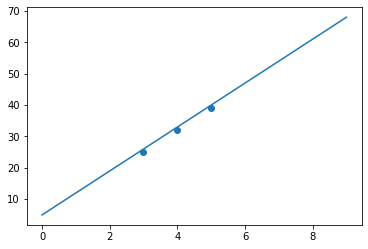

In [30]:
x = [x for x in range(10)]
y = [x*7+5 for x in range(10)]
plt.scatter(input_data, target)
plt.plot(x, y)
plt.show()

위의 결과로 기울기는 더 이상 수정할 필요가 없을 것 같고, 절편만 다시 좀 낮춰주면 될 것 같다.  
절편을 1 낮춘 4로 다시 수정하면,

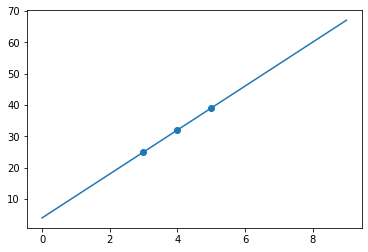

In [31]:
x = [x for x in range(10)]
y = [x*7+4 for x in range(10)]
plt.scatter(input_data, target)
plt.plot(x, y)
plt.show()

입력과 타깃을 잘 나타내는 직선 그래프를 찾았다.  

이 1차 함수가 **선형 회귀로 만든 최적의 모델**이다. 

이제 이 모델을 이용해 새로운 입력에 대한 예측을 할 수 있게 된다.

## 사이킷런의 당뇨병 환자 데이터

In [32]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print(diabetes.data.shape, diabetes.target.shape)

(442, 10) (442,)


이 당뇨병 환자 데이터는 data 속성에 422x10 크기의 2차원 배열과, target 속성에 422x1 크기의 1차원 배열을 가지고 있다.  

422개의 행 = 422개의 샘플(sample)
10개의 열 = 10개의 특성(feature) = 특징 = 속성 = 독립 변수(independent variable) = 설명 변수(explanatory variable)  

샘플 예시


In [33]:
diabetes.data[0:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [34]:
diabetes.target[:3]

array([151.,  75., 141.])

각 샘플(입력 데이터)에 대응하는 타깃 데이터의 값을 보고 규칙을 찾아 모델로 나타내면 된다.



> 실전에서는 이러한 데이터를 준비할 때 해당 분야의 전문가에게 도움을 받는 것이 좋으며 많은 공을 들여야 한다.  

각 샘플의 3번 째 특성에 대한 타깃 데이터 산점도



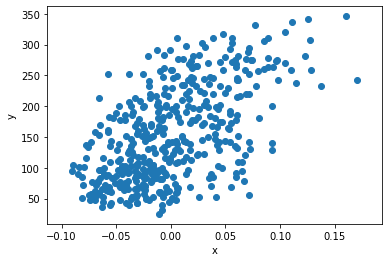

In [35]:
plt.scatter(diabetes.data[:, 2], diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

대략 입력과 타깃이 정비례 관계인 것을 확인할 수 있다.  

위에서 추가 적으로 알 수 있는 점은 2차원 이상의 배열에서는 파이썬의 리스트보다 numpy 배열이 슬라이싱 방법에 있어서 훨씬 편리하다는 점이다.  
위의 방식으로 리스트를 슬라이싱하면 에러가 발생하므로 외부 리스트를 이터레이션 해야 한다.  

훈련 데이터 준비


In [0]:
x = diabetes.data[:, 2]
y = diabetes.target

# 03-2 경사 하강법(Gradient descent)

---



## 경사 하강법이란  
1개의 특성을 나타내는 2차원 평면상의 데이터 규칙을 나타내기 위해서는 1차원 그래프인 직선(선형) 그래프가 필요했다.  
만약 n개의 특성을 나타내는 n+1차원 평면상의 데이터 규칙을 나타내기 위해서는 초평면(hyperplane)인 n차원 그래프가 필요하다. 하지만 3차원을 넘어가는 그래프는 상상하기도 힘들기 때문에, 보통 2~3차원 그래프들을 이용해 특성을 나타내고, 직관을 얻는다.  
**낮은 차원에서 얻은 직관은 높은 차원으로 확장될 수 있기 때문이다.**  

경사 하강법은 <u>**모델이 데이터를 잘 표현할 수 있도록 기울기를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘**</u>이다.  

이 경사 하강법은 많은 양의 데이터에 사용하기 좋은 알고리즘이다.  


> 회귀 문제를 푸는 다른 알고리즘  
ex) 정규 방정식, 결정 트리, 서포트 벡터 머신  

용어 정리

$$기울기 a = 가중치 w = 계수 \theta$$
$$y = 타깃\ 데이터(실제\ 데이터)$$
$$\hat{y} = 예측값(모델이\ 새로운\ 입력\ 값을\ 받아\ 예측한\ 값)$$  






## 예측값으로 올바른 모델 찾기 (변화율 이용)


#### 1. 무작위로 w와 b 초기화  

In [0]:
w = 1.0
b = 1.0

#### 2. 훈련 데이터에서 무작위로 선택한 샘플 데이터로 y-hat 얻기  
 

In [38]:
y_hat = x[0] * w + b
print(y_hat)

1.0616962065186886


#### 3. 타깃과 예측 데이터 비교하기


In [39]:
print(y[0])

151.0


#### 4. 타깃에 더 가까워 지도록 w 값(또는 b 값) 조절해 예측값 바꾸기  

가장 중요한 부분인데, w와 b를 증가시키거나 감소시켜 y_hat이 증가하는지, 감소하는지를 알아야 한다. 예를 들어 다음과 같이 w를 0.1만큼 증가시켜보고 예측값 y_hat의 변화량을 확인해 본다.


In [40]:
w_inc = w + 0.1
y_hat_inc = x[0] * w_inc + b
print(y_hat_inc)

1.0678658271705574


위의 결과를 통해 w가 증가하면 y_hat이 증가한다는 사실을 알았다.  
이제 w의 증가량(변화량)에 의한 y_hat의 증가량(변화량)을 계산해 본다.


In [41]:
w_rate = (y_hat_inc  - y_hat) / (w_inc - w)
print(w_rate)

0.061696206518688734


이 값은 훈련 데이터의 입력 샘플 값인 x[0]의 값이 된다. 즉, 훈련 데이터 x[0]에 대한 w의 변화율은 x[0]이라는 말이다.  
이를 직관적으로 이해해보면, 거꾸로 w를 변수로 생각했을 때 곱해지는 가중치는 x[0]가 되기 때문이다.  
좀 더 수학적으로는 위의 수식을 풀어 써보면 알 수 있다.  
<br>
$$w\_rate = \frac {y\_hat\_inc-y\_hat} {w\_inc-w} = \frac {(x[0]*w\_inc+b)-(x[0]*w+b)} {w\_inc - w}$$
$$ = \frac {(x[0]*(w+0.1) - w)} {(w+0.1)-w} = x[0]$$  
이를 통해 아까 예시처럼 y_hat이 y보다 작아 y_hat을 증가시켜야 하는 경우, 변화율이 양수면 w를 증가, 음수면 w를 감소시키면 된다.  
<br>
이때 w에 w_rate(변화율)를 더해주면 w_rate가 양수인 경우 w가 증가하고, 음수인 경우에는 w가 감소해, 결과적으로 y_hat이 증가한다.  


In [42]:
w_new = w + w_rate
print(w_new)

1.0616962065186888



절편 b를 업데이트 하는 방법 역시 변화율을 이용하는데, 절편은 직관적으로 변화율이 1인 것을 알 수 있다. 따라서 변화시키고 싶은 만큼 더하거나 빼주면 된다.

#### 5. 모든 샘플을 처리할 때까지 위를 반복


## 오차 역전파(backpropagation)로 가중치와 절편 업데이트  
<br>

y-hat과 y의 차이를 이용하여 w와 b를 업데이트하는 방법으로 오차가 연이어 전파되는 모습으로 수행된다.  
이 방법은 y-hat과 y의 차이가 클 경우나 ,y-hat이 y보다 더 커져서 y-hat을 감소시켜야 할 경우에 유용하다.  
핵심은 w에 변화율을 단지 더하는 것이 아닌, y-y_hat인 오차의 양을 변화율에 곱한 뒤 더하는 방법으로 업데이트하는 것이다.

#### 1. 오차의 변화율을 곱하여 가중치 업데이트

In [43]:
err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + 1 * err
print(w_new, b_new)

10.250624555904514 150.9383037934813


#### 2. 두 번째 샘플을 이용해 w와 b 업데이트

In [44]:
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

14.132317616381767 75.52764127612664


#### 3. 전체 샘플을 반복


In [46]:
for x_i, y_i in zip(x, y):
  y_hat = x_i * w + b
  err = y_i - y_hat
  w_rate = x_i
  w = w + w_rate * err
  b = b + 1 * err
print(w, b)

796.8938154365328 114.80085167130312


이 결과가 입력 x와 타깃 y로 이루어진 훈련 데이터 세트에 대한 모델의 w와 b 값이다.


#### 4. 그래프 그려보기


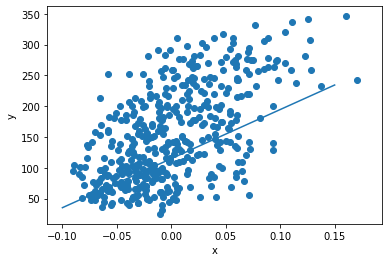

In [50]:
plt.scatter(x, y)
pt_st = (-0.1, -0.1 * w + b)  # (x's start point, y's start point)
pt_end = (0.15, 0.15 * w + b)  # (x's end point, y's end point)
plt.plot([pt_st[0], pt_end[0]], [pt_st[1], pt_end[1]])  # ([x's start point, x's end point], [y's start point, y's end point])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#### 5. 에포크(epoch) 반복하기  

***전체 훈련 데이터를 모두 이용하여 한 단위의 작업을 진행하는 것***을 에포크라 부르고, 일반적으로 수십에서 수천 번의 에포크를 반복한다.

In [51]:
for i in range(99):  # 100번의 에포크 반복(위에서 한 번 진행했으므로 99번 진행)
  for x_i, y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err
print(w, b)

913.5973364345905 123.39414383177204


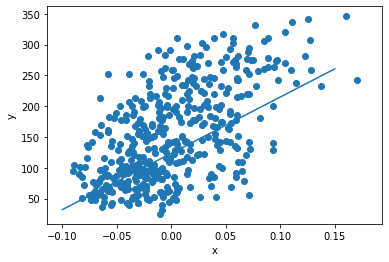

In [52]:
plt.scatter(x, y)
pt_st = (-0.1, -0.1 * w + b)  # (x's start point, y's start point)
pt_end = (0.15, 0.15 * w + b)  # (x's end point, y's end point)
plt.plot([pt_st[0], pt_end[0]], [pt_st[1], pt_end[1]])  # ([x's start point, x's end point], [y's start point, y's end point])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

100번의 에포크를 수행한 모델이 사용했을 때 그래프가 데이터를 좀 더 잘 나타내고 있다.  

결과 모델  

$$\hat{y}=913.6x + 123.4$$  


#### 6. 모델로 예측해보기


287.8416643899983


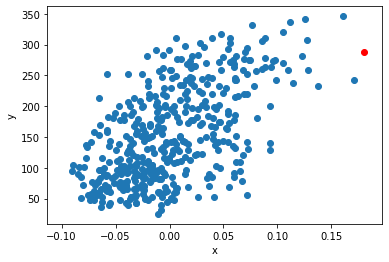

In [54]:
x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x, y)
plt.scatter(x_new, y_pred, c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

이처럼 오차 역전파를 이용하면 예측값과 타깃값과의 오차가 w와 b에 반영될 수 있고, 오차의 부호에 따라 w와 b가 커지거나 작아지도록 업데이트 할 수 있다.